In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
lst = [0] * 10**5

In [3]:
import timeit
timeit.timeit(stmt='lst[0]', globals=globals())

0.03161202557384968

In [4]:
timeit.timeit(stmt='lst[10**5-1]', globals=globals())

0.03202724829316139

In [5]:
times = [timeit.timeit(stmt='lst[{}]'.format(i), 
                       globals=globals(), 
                       number=100) 
         for i in range(10**5)]

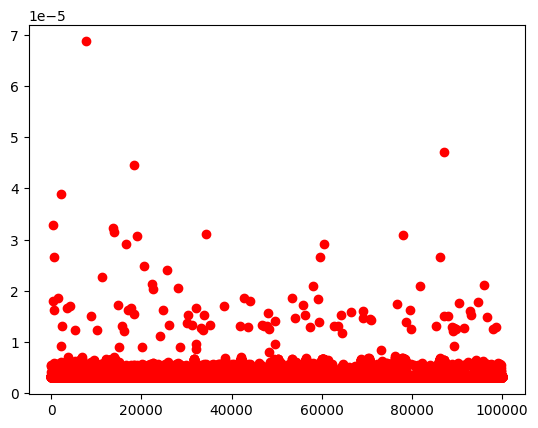

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

Observation: accessing an element in a list by index takes a constant amount of time, regardless of position.

How? **A Python list uses an array as its underlying data storage mechanism.** To access an element in an array, the interpreter:

1. Computes an *offset* into the array by multiplying the element's index by the size of each array entry (which are uniformly sized, since they are merely *references* to the actual elements)
2. Adds the offset to the *base address* of the array

## 3. Linear Search

Task: to locate an element with a given value in a list (array).

In [7]:
def index(lst, x):
    try:
        return lst.index(x)
    except ValueError:
        return -1

In [8]:
lst = list(range(100))
index(lst, 10)

10

In [9]:
index(lst, 99)

99

In [10]:
index(lst, -1)

-1

In [11]:
import timeit
lst = list(range(1000))
times = [timeit.timeit(stmt='index(lst, {})'.format(x), 
                       globals=globals(), 
                       number=100)
         for x in range(1000)]

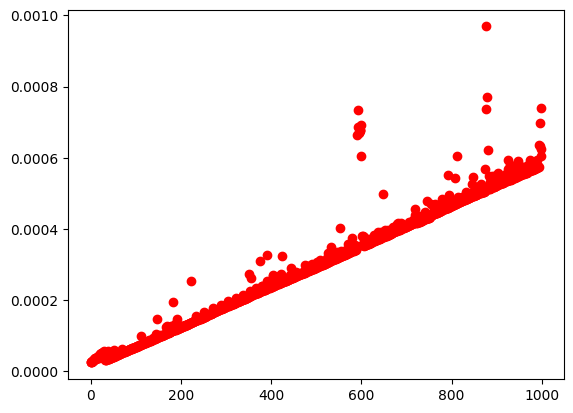

In [12]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

## 4. Binary search

Task: to locate an element with a given value in a list (array) whose contents are *sorted in ascending order*.

In [13]:
def index(lst, x):
    left, right = 0, len(lst) - 1
    while left <= right:
        mid = (left + right) // 2
        if lst[mid] == x:
            return mid
        elif lst[mid] < x:
            left = mid + 1
        else:
            right = mid - 1
    return -1

In [14]:
lst = list(range(1000))
index(lst, 10)

10

In [20]:
index(lst, 999)

999

In [21]:
index(lst, -1)

-1

In [15]:
import timeit
lst = list(range(1000))
times = [timeit.timeit(stmt='index(lst, {})'.format(x), 
                       globals=globals(), 
                       number=1000)
         for x in range(1000)]

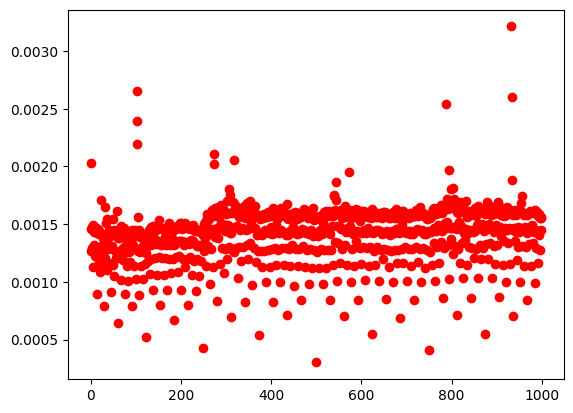

In [16]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [17]:
import timeit
times = []
for size in range(1000, 100000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='index(lst, -1)',
                               globals=globals(),
                               number=1000))

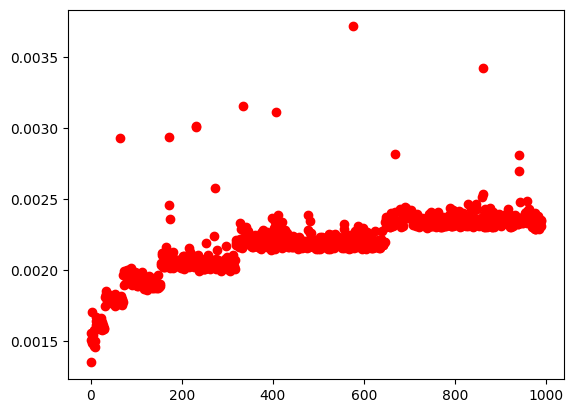

In [18]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

## 5. Insertion sort

Task: to sort the values in a given list (array) in ascending order.

In [19]:
import random
lst = list(range(1000))
random.shuffle(lst)

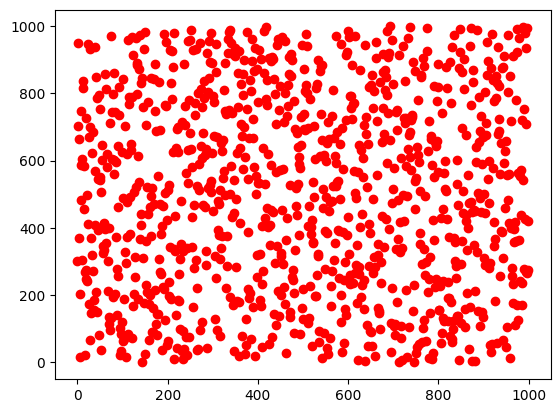

In [20]:
plt.plot(lst, 'ro')
plt.show()

In [21]:
def insertion_sort(lst):
    # Traverse through 1 to len(lst)
    for i in range(1, len(lst)):
        key = lst[i]
        # Move elements of lst[0..i-1], that are greater than key,
        # to one position ahead of their current position
        j = i - 1
        while j >= 0 and key < lst[j]:
            lst[j + 1] = lst[j]
            j -= 1
        lst[j + 1] = key

In [22]:
insertion_sort(lst)

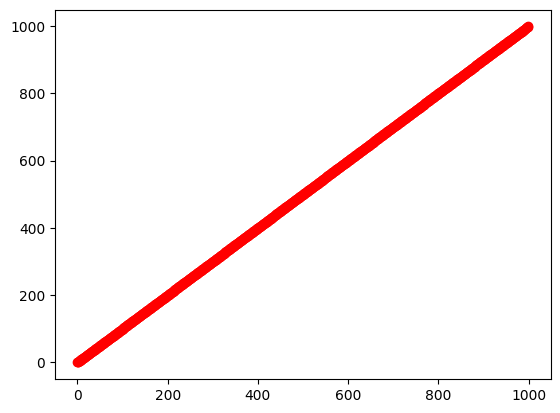

In [23]:
plt.plot(lst, 'ro')
plt.show()

In [24]:
import timeit
import random
times = [timeit.timeit(stmt='insertion_sort(lst)',
                       setup='lst=list(range({})); random.shuffle(lst)'.format(size),
                       globals=globals(),
                       number=1)
         for size in range(100, 5000, 250)]

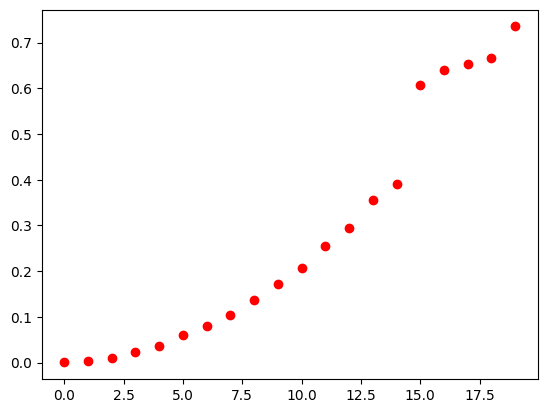

In [25]:
plt.plot(times, 'ro')
plt.show()

In [27]:
2**640

4562440617622195218641171605700291324893228507248559930579192517899275167208677386505912811317371399778642309573594407310688704721375437998252661319722214188251994674360264950082874192246603776